In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('loan_data_2007_2014.csv')

In [4]:
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(466285, 75)

In [6]:
df.sample(5)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
384709,384709,16572380,18684894,11000,11000,10950.0,60 months,16.99,273.32,D,...,NaN,NaN,NaN,NaN,NaN,NaN,8300.0,NaN,NaN,NaN
141565,141565,4455365,5687560,9700,9700,9700.0,36 months,14.33,333.08,C,...,NaN,NaN,NaN,NaN,NaN,NaN,10500.0,NaN,NaN,NaN
13753,13753,776534,978891,1600,1600,1600.0,36 months,13.49,54.29,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
246825,246825,35226333,37907708,20000,20000,20000.0,60 months,8.19,407.35,A,...,NaN,NaN,NaN,NaN,NaN,NaN,105600.0,NaN,NaN,NaN
151841,151841,4104726,5236892,2800,2800,2800.0,36 months,21.00,105.50,E,...,NaN,NaN,NaN,NaN,NaN,NaN,4700.0,NaN,NaN,NaN


In [7]:
df.duplicated().sum()

0

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [10]:
drop_col=df.columns[df.isnull().mean()>0.30].tolist()

In [11]:
drop_col

['desc',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'next_pymnt_d',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m']

In [12]:
df['open_rv_12m'].isnull().mean()

1.0

In [13]:
df=df.drop(columns=drop_col)

In [14]:
df=df.drop(columns=['Unnamed: 0','id','member_id'])

<function matplotlib.pyplot.show(close=None, block=None)>

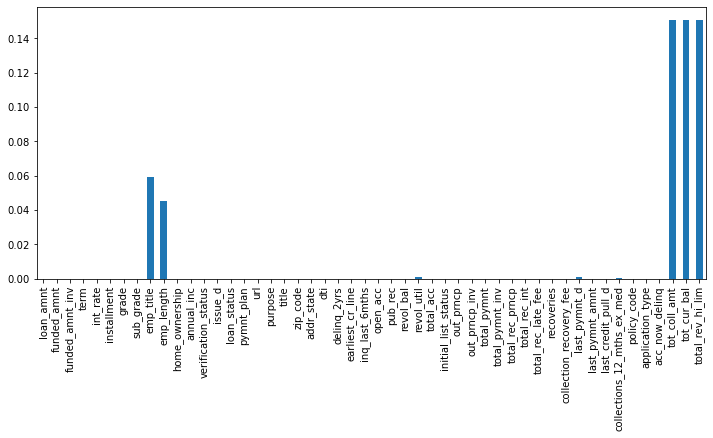

In [15]:
fig, ax = plt.subplots(figsize=(12, 5))
df.isnull().mean().plot(kind='bar')
plt.show

In [16]:
df.shape

(466285, 50)

In [17]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [18]:
loan=['Charged Off','Late (31-120 days)','Does not meet the credit policy. Status:Charged Off','Default']

In [19]:
df['loan_status']=np.where(df['loan_status'].isin(loan),0,1)

In [20]:
df['loan_status'].unique()

array([1, 0])

In [21]:
y=df['loan_status']

In [22]:
df_num=df.select_dtypes(exclude='object')

In [23]:
df_num.shape

(466285, 31)

In [24]:
df_cat=df.select_dtypes(include='object')

In [25]:
df_cat.shape

(466285, 19)

In [26]:
from sklearn.feature_selection import VarianceThreshold

In [27]:
var=VarianceThreshold(0.05)

In [28]:
var.fit(df_num)

VarianceThreshold(threshold=0.05)

In [29]:
imp_col=df_num.columns[var.get_support()]

In [30]:
df_num=df_num[imp_col]

In [31]:
df_num.shape

(466285, 28)

In [32]:
df_num=df_num.drop(columns='loan_status')

In [33]:
df_num=df_num.join(y)

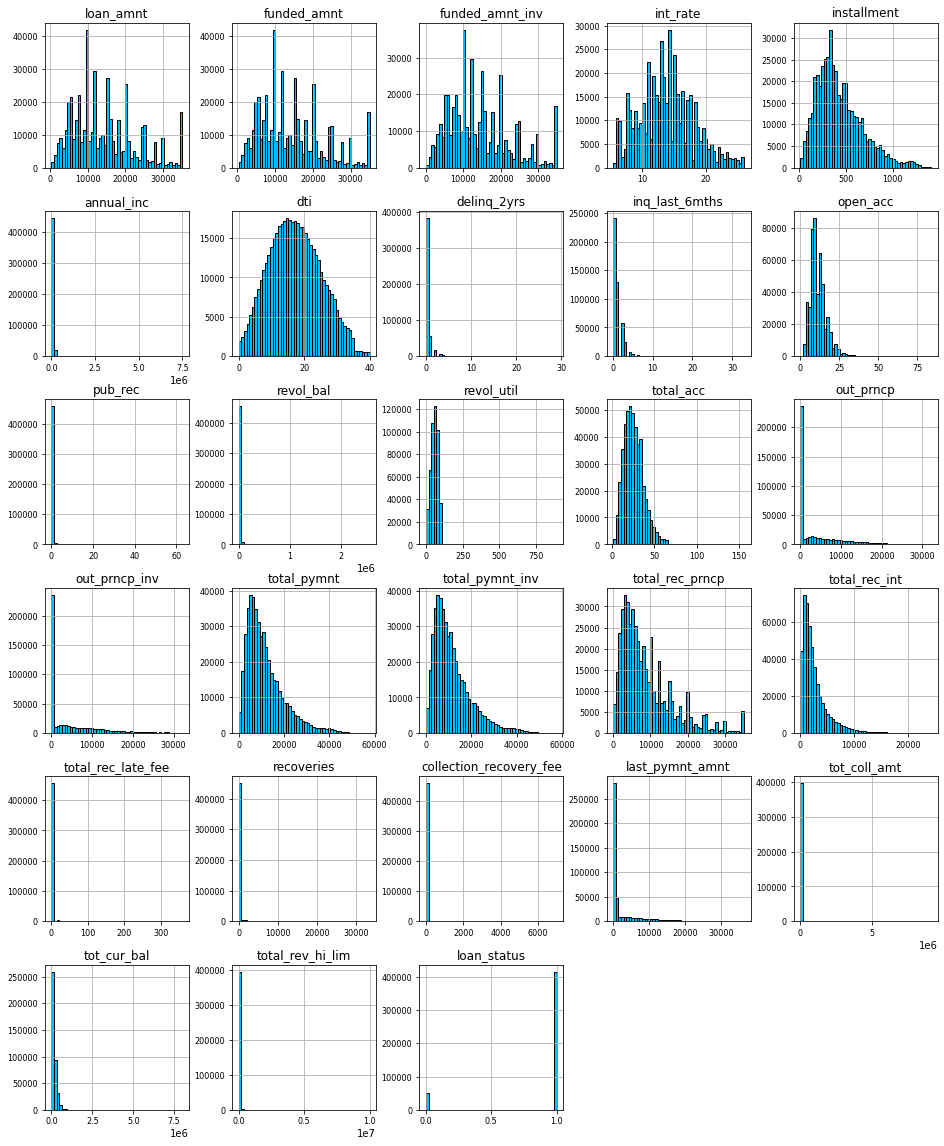

In [34]:
fig=df_num.hist(figsize=(16,20),bins=50,
                color='deepskyblue',edgecolor='black',xlabelsize=8,ylabelsize=8)

In [35]:
corr=df_num.corr()

In [36]:
mask=np.triu(np.ones_like(corr,dtype=bool))

In [37]:
sns.set(rc={'figure.figsize':(25,15)})
sns.set_style('whitegrid')

<AxesSubplot:>

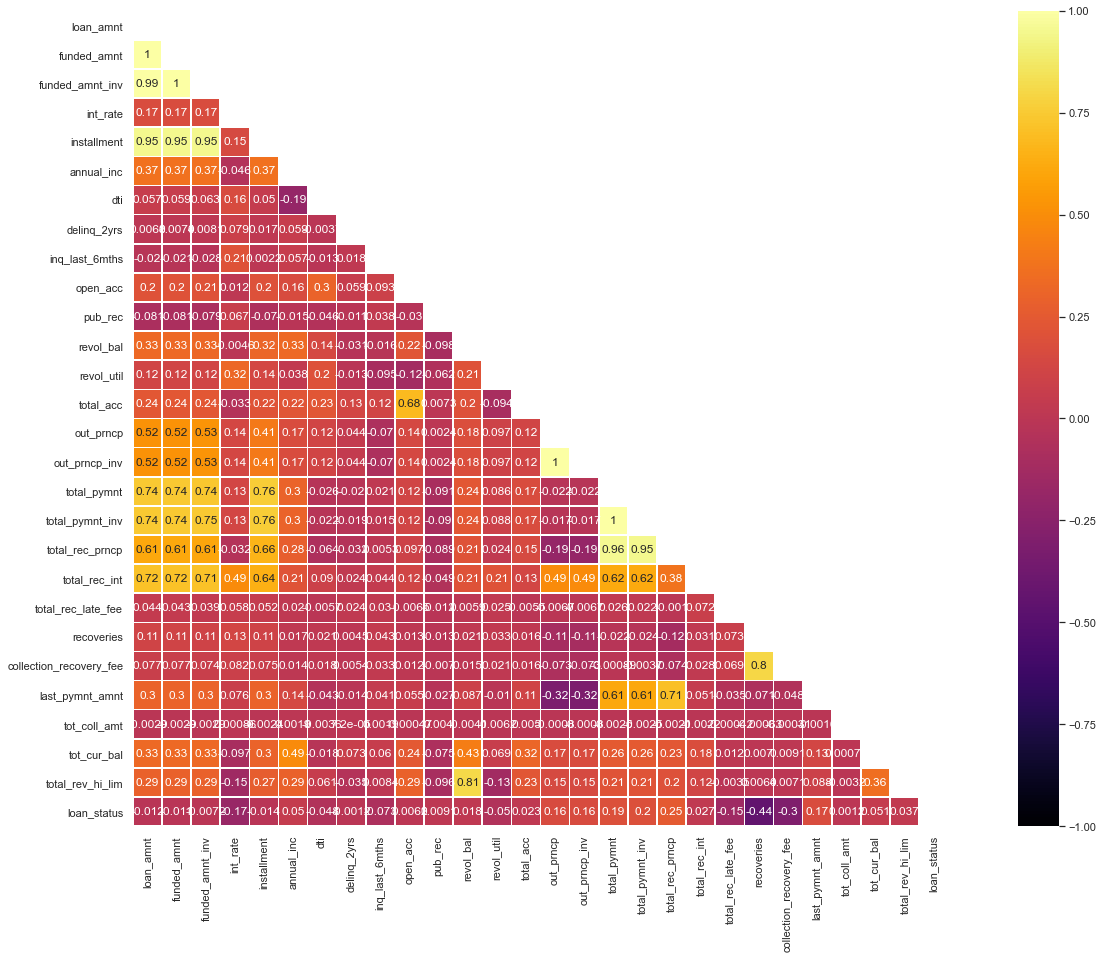

In [38]:
sns.heatmap(corr,mask=mask,cmap='inferno',square=True,annot=True,vmin = -1,vmax=1,linewidth=0.6,edgecolor='w')

In [39]:
drop_col=['loan_amnt','funded_amnt','installment','out_prncp_inv','total_pymnt_inv','total_rec_prncp','collection_recovery_fee']

In [40]:
df_num=df_num.drop(columns=drop_col)

<AxesSubplot:>

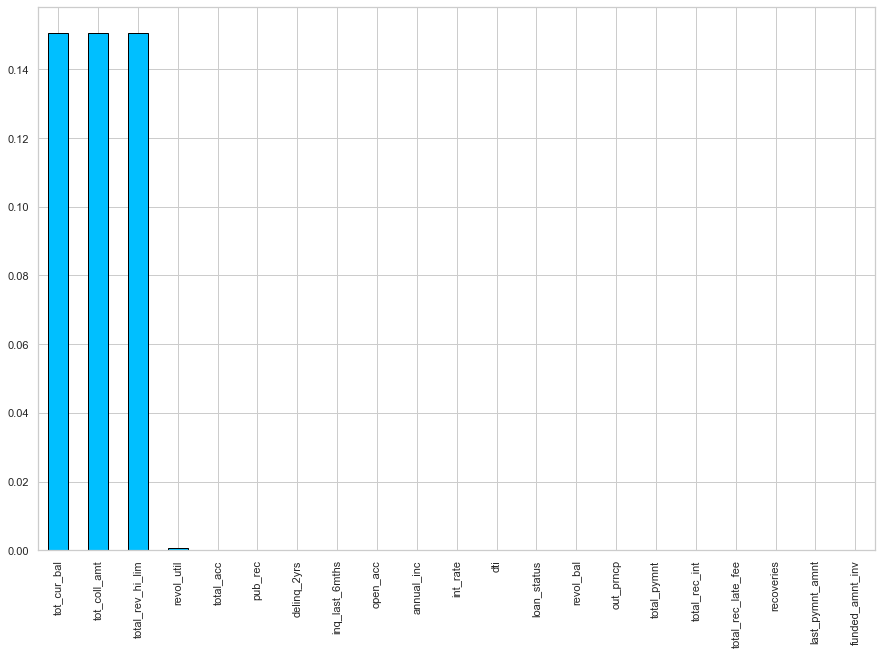

In [41]:
fig,ax=plt.subplots(figsize=(15,10))
df_num.isnull().mean().sort_values(ascending=False).plot(kind='bar',color='deepskyblue',edgecolor='black')

In [42]:
nan_col=df_num.isnull().sum().sort_values(ascending=False)[:3].index.tolist()

In [43]:
nan_col

['tot_cur_bal', 'tot_coll_amt', 'total_rev_hi_lim']

In [44]:
nan_col_impute=[i+'_impute' for i in nan_col]

In [45]:
nan_col_impute

['tot_cur_bal_impute', 'tot_coll_amt_impute', 'total_rev_hi_lim_impute']

In [46]:
for i in range(len(nan_col)):
    df_num[nan_col_impute[i]]=df_num[nan_col[i]]

In [47]:
df_num.isnull().sum()

funded_amnt_inv                0
int_rate                       0
annual_inc                     4
dti                            0
delinq_2yrs                   29
inq_last_6mths                29
open_acc                      29
pub_rec                       29
revol_bal                      0
revol_util                   340
total_acc                     29
out_prncp                      0
total_pymnt                    0
total_rec_int                  0
total_rec_late_fee             0
recoveries                     0
last_pymnt_amnt                0
tot_coll_amt               70276
tot_cur_bal                70276
total_rev_hi_lim           70276
loan_status                    0
tot_cur_bal_impute         70276
tot_coll_amt_impute        70276
total_rev_hi_lim_impute    70276
dtype: int64

In [48]:
df_num.sample(5)

,funded_amnt_inv,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,...,total_rec_late_fee,recoveries,last_pymnt_amnt,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status,tot_cur_bal_impute,tot_coll_amt_impute,total_rev_hi_lim_impute
92368,20250.0,15.22,52000.0,5.84,2.0,0.0,7.0,0.0,9211,50.6,...,0.0,0.0,484.09,0.0,183147.0,18200.0,1,183147.0,0.0,18200.0
174308,14750.0,18.49,56500.0,30.86,0.0,3.0,14.0,0.0,20220,78.1,...,0.0,0.0,6833.30,0.0,133773.0,25900.0,1,133773.0,0.0,25900.0
430606,6500.0,14.16,33000.0,3.78,0.0,2.0,3.0,1.0,3322,51.0,...,0.0,0.0,222.67,0.0,3322.0,6550.0,0,3322.0,0.0,6550.0
225611,8000.0,7.62,30000.0,19.68,0.0,0.0,13.0,0.0,14439,64.8,...,0.0,0.0,258.77,NaN,NaN,NaN,1,NaN,NaN,NaN
222056,25000.0,17.27,95000.0,12.32,0.0,0.0,13.0,0.0,28073,76.5,...,0.0,0.0,922.51,NaN,NaN,NaN,1,NaN,NaN,NaN


In [49]:
def fill_nan(col_impute,col):
    df_num[col_impute][df_num[col_impute].isnull()]=df_num[col].dropna().sample(df_num[col].isnull().sum()).values

In [50]:
for i in range(len(nan_col)):
    fill_nan(nan_col_impute[i],nan_col[i])

In [51]:
#for i in range(len(nan_col)):
#    fig=plt.figure(figsize=(18,10))
#    ax=fig.add_subplot(111)
#    df_num[nan_col[i]].plot(kind='kde',ax=ax,color='blue')
#    df_num[nan_col_impute[i]].plot(kind='kde',ax=ax,color='orange')
#    lines,labels=ax.get_legend_handles_labels()
#    labels = ['Original variable', 'Imputed variable']
#    ax.legend(lines,labels,loc='best')
#    plt.show()

In [52]:
df_num=df_num.drop(columns=nan_col)

In [53]:
nan_col_impute

['tot_cur_bal_impute', 'tot_coll_amt_impute', 'total_rev_hi_lim_impute']

In [54]:
df_num=df_num.rename(columns={'tot_cur_bal_impute':'tot_cur_bal','tot_coll_amt_impute':'tot_coll_amt','total_rev_hi_lim_impute':'total_rev_hi_lim'})

In [55]:
df_num=df_num.dropna()

In [56]:
df_num.isnull().sum()

funded_amnt_inv       0
int_rate              0
annual_inc            0
dti                   0
delinq_2yrs           0
inq_last_6mths        0
open_acc              0
pub_rec               0
revol_bal             0
revol_util            0
total_acc             0
out_prncp             0
total_pymnt           0
total_rec_int         0
total_rec_late_fee    0
recoveries            0
last_pymnt_amnt       0
loan_status           0
tot_cur_bal           0
tot_coll_amt          0
total_rev_hi_lim      0
dtype: int64

In [57]:
df_num.describe()

,funded_amnt_inv,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,...,out_prncp,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,loan_status,tot_cur_bal,tot_coll_amt,total_rev_hi_lim
count,465945.000000,465945.000000,4.659450e+05,465945.000000,465945.000000,465945.000000,465945.000000,465945.000000,4.659450e+05,465945.000000,...,465945.000000,465945.000000,465945.000000,465945.000000,465945.000000,465945.000000,465945.000000,4.659450e+05,4.659450e+05,4.659450e+05
mean,14225.099314,13.828301,7.326927e+04,17.222069,0.284555,0.804822,11.191688,0.160639,1.623488e+04,56.176947,...,4411.075743,11542.675549,2589.145448,0.649031,85.329506,3124.301717,0.890738,1.387166e+05,1.890930e+02,3.035478e+04
std,8295.864514,4.357446,5.494322e+04,7.849979,0.797168,1.091554,4.985438,0.510991,2.066318e+04,23.732628,...,6355.050117,8265.244601,2483.828760,5.261711,552.220911,5554.764160,0.311968,1.517042e+05,1.350180e+04,3.615291e+04
min,0.000000,5.420000,1.896000e+03,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,8000.000000,10.990000,4.500000e+04,11.370000,0.000000,0.000000,8.000000,0.000000,6.421000e+03,39.200000,...,0.000000,5554.408448,957.740000,0.000000,0.000000,312.750000,1.000000,2.864000e+04,0.000000e+00,1.350000e+04
50%,12000.000000,13.660000,6.300000e+04,16.870000,0.000000,0.000000,10.000000,0.000000,1.177100e+04,57.600000,...,449.160000,9421.340000,1819.120000,0.000000,0.000000,545.960000,1.000000,8.151100e+04,0.000000e+00,2.280000e+04
75%,19950.000000,16.490000,8.886300e+04,22.780000,0.000000,1.000000,14.000000,0.000000,2.033700e+04,74.700000,...,7344.630000,15309.980000,3305.060000,0.000000,0.000000,3189.440000,1.000000,2.088070e+05,0.000000e+00,3.790000e+04
max,35000.000000,26.060000,7.500000e+06,39.990000,29.000000,33.000000,84.000000,63.000000,2.568995e+06,892.300000,...,32160.380000,57777.579870,24205.620000,358.680000,33520.270000,36234.440000,1.000000,8.000078e+06,9.152545e+06,9.999999e+06


In [58]:
def outliers(df,col):
    per_75=df[col].quantile(0.75)
    per_25=df[col].quantile(0.25)
    iqr=per_75-per_25
    uppr_lmt=per_75+(1.5*iqr)
    lower_lmt=per_25-(1.5*iqr)
    df[col]=np.where(df[col]>uppr_lmt,uppr_lmt,
                     np.where(df[col]<lower_lmt,lower_lmt,df[col]))
    return df[col]

In [59]:
for i in df_num.columns:
    outliers(df_num,i)

In [60]:
df_num.describe()

,funded_amnt_inv,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,...,out_prncp,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,loan_status,tot_cur_bal,tot_coll_amt,total_rev_hi_lim
count,465945.000000,465945.000000,465945.000000,465945.000000,465945.0,465945.000000,465945.000000,465945.0,465945.000000,465945.000000,...,465945.000000,465945.000000,465945.000000,465945.0,465945.0,465945.000000,465945.0,465945.000000,465945.0,465945.000000
mean,14225.099314,13.820387,70196.436171,17.222063,0.0,0.724503,11.090742,0.0,14707.974961,56.174217,...,4198.174389,11280.971853,2405.321587,0.0,0.0,2065.607565,1.0,133467.275189,0.0,28078.750934
std,8295.864514,4.336678,33724.556899,7.849962,0.0,0.862283,4.647087,0.0,10848.277840,23.694975,...,5742.482987,7479.871079,1897.592692,0.0,0.0,2741.257068,0.0,129502.097941,0.0,19102.663341
min,0.000000,5.420000,1896.000000,0.000000,0.0,0.000000,1.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.0,0.000000,0.0,0.000000
25%,8000.000000,10.990000,45000.000000,11.370000,0.0,0.000000,8.000000,0.0,6421.000000,39.200000,...,0.000000,5554.408448,957.740000,0.0,0.0,312.750000,1.0,28640.000000,0.0,13500.000000
50%,12000.000000,13.660000,63000.000000,16.870000,0.0,0.000000,10.000000,0.0,11771.000000,57.600000,...,449.160000,9421.340000,1819.120000,0.0,0.0,545.960000,1.0,81511.000000,0.0,22800.000000
75%,19950.000000,16.490000,88863.000000,22.780000,0.0,1.000000,14.000000,0.0,20337.000000,74.700000,...,7344.630000,15309.980000,3305.060000,0.0,0.0,3189.440000,1.0,208807.000000,0.0,37900.000000
max,35000.000000,24.740000,154657.500000,39.895000,0.0,2.500000,23.000000,0.0,41211.000000,127.950000,...,18361.575000,29943.337328,6826.040000,0.0,0.0,7504.475000,1.0,479057.500000,0.0,74500.000000


In [61]:
def skew(df,col):
    df[col]=stats.yeojohnson(df[col])[0]

In [62]:
from scipy import stats

In [63]:
for i in df_num[:-4]:
    skew(df_num,i)
    print(i,df_num[i].skew())

funded_amnt_inv -0.035193118121500666
int_rate -0.027457333095469515
annual_inc -0.006700562599732798
dti -0.07635226689431905
delinq_2yrs 0
inq_last_6mths 0.23863392055739566
open_acc -0.010092927476372256
pub_rec 0
revol_bal -0.0353943803440539
revol_util -0.22243643294310264
total_acc -0.023513610342074623
out_prncp 0.029826798107506505
total_pymnt -0.024998170953354597
total_rec_int -0.030086512065306683
total_rec_late_fee 0
recoveries 0
last_pymnt_amnt -0.0032238340051873953
loan_status 0
tot_cur_bal -0.06900054652956125
tot_coll_amt 0
total_rev_hi_lim -0.02059399184379568


In [64]:
drop_lst=[i for i in df_num.columns if df_num[i].skew()==0]     

In [65]:
df_num=df_num.drop(columns=drop_lst)

In [66]:
from sklearn.preprocessing import StandardScaler

In [67]:
df_cat.head(10)

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,pymnt_plan,url,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type
0,36 months,B,B2,NaN,10+ years,RENT,Verified,Dec-11,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Computer,860xx,AZ,Jan-85,f,Jan-15,Jan-16,INDIVIDUAL
1,60 months,C,C4,Ryder,< 1 year,RENT,Source Verified,Dec-11,n,https://www.lendingclub.com/browse/loanDetail....,car,bike,309xx,GA,Apr-99,f,Apr-13,Sep-13,INDIVIDUAL
2,36 months,C,C5,NaN,10+ years,RENT,Not Verified,Dec-11,n,https://www.lendingclub.com/browse/loanDetail....,small_business,real estate business,606xx,IL,Nov-01,f,Jun-14,Jan-16,INDIVIDUAL
3,36 months,C,C1,AIR RESOURCES BOARD,10+ years,RENT,Source Verified,Dec-11,n,https://www.lendingclub.com/browse/loanDetail....,other,personel,917xx,CA,Feb-96,f,Jan-15,Jan-15,INDIVIDUAL
4,60 months,B,B5,University Medical Group,1 year,RENT,Source Verified,Dec-11,n,https://www.lendingclub.com/browse/loanDetail....,other,Personal,972xx,OR,Jan-96,f,Jan-16,Jan-16,INDIVIDUAL
5,36 months,A,A4,Veolia Transportaton,3 years,RENT,Source Verified,Dec-11,n,https://www.lendingclub.com/browse/loanDetail....,wedding,My wedding loan I promise to pay back,852xx,AZ,Nov-04,f,Jan-15,Sep-15,INDIVIDUAL
6,60 months,C,C5,Southern Star Photography,8 years,RENT,Not Verified,Dec-11,n,https://www.lendingclub.com/browse/loanDetail....,debt_consolidation,Loan,280xx,NC,Jul-05,f,Jan-16,Jan-16,INDIVIDUAL
7,36 months,E,E1,MKC Accounting,9 years,RENT,Source Verified,Dec-11,n,https://www.lendingclub.com/browse/loanDetail....,car,Car Downpayment,900xx,CA,Jan-07,f,Jan-15,Dec-14,INDIVIDUAL
8,60 months,F,F2,NaN,4 years,OWN,Source Verified,Dec-11,n,https://www.lendingclub.com/browse/loanDetail....,small_business,Expand Business & Buy Debt Portfolio,958xx,CA,Apr-04,f,Apr-12,Aug-12,INDIVIDUAL
9,60 months,B,B5,Starbucks,< 1 year,RENT,Verified,Dec-11,n,https://www.lendingclub.com/browse/loanDetail....,other,Building my credit history.,774xx,TX,Sep-04,f,Nov-12,Mar-13,INDIVIDUAL


In [68]:
df_cat.isnull().mean()*100

term                   0.000000
grade                  0.000000
sub_grade              0.000000
emp_title              5.916553
emp_length             4.505399
home_ownership         0.000000
verification_status    0.000000
issue_d                0.000000
pymnt_plan             0.000000
url                    0.000000
purpose                0.000000
title                  0.004289
zip_code               0.000000
addr_state             0.000000
earliest_cr_line       0.006219
initial_list_status    0.000000
last_pymnt_d           0.080637
last_credit_pull_d     0.009007
application_type       0.000000
dtype: float64

In [69]:
df_cat['term']=df_cat['term'].str.strip('months')

In [70]:
df_cat['emp_length']=df_cat['emp_length'].str.extract(r'(^\d+)').fillna(0)

In [71]:
df_cat['emp_title_impute']=df_cat['emp_title']

In [72]:
df_cat['emp_title_impute'][df_cat['emp_title_impute'].isnull()]=df_cat['emp_title'].dropna().sample(df_cat['emp_title'].isnull().sum()).values

In [73]:
df_cat=df_cat.drop(columns=['emp_title'])

In [74]:
df_cat=df_cat.rename(columns={'emp_title_impute':'emp_title'})

In [75]:
df_cat=df_cat.dropna()

In [76]:
df_cat.head()

,term,grade,sub_grade,emp_length,home_ownership,verification_status,issue_d,pymnt_plan,url,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type,emp_title
0,36,B,B2,10,RENT,Verified,Dec-11,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Computer,860xx,AZ,Jan-85,f,Jan-15,Jan-16,INDIVIDUAL,teacher
1,60,C,C4,0,RENT,Source Verified,Dec-11,n,https://www.lendingclub.com/browse/loanDetail....,car,bike,309xx,GA,Apr-99,f,Apr-13,Sep-13,INDIVIDUAL,Ryder
2,36,C,C5,10,RENT,Not Verified,Dec-11,n,https://www.lendingclub.com/browse/loanDetail....,small_business,real estate business,606xx,IL,Nov-01,f,Jun-14,Jan-16,INDIVIDUAL,Ed Morse Honda
3,36,C,C1,10,RENT,Source Verified,Dec-11,n,https://www.lendingclub.com/browse/loanDetail....,other,personel,917xx,CA,Feb-96,f,Jan-15,Jan-15,INDIVIDUAL,AIR RESOURCES BOARD
4,60,B,B5,1,RENT,Source Verified,Dec-11,n,https://www.lendingclub.com/browse/loanDetail....,other,Personal,972xx,OR,Jan-96,f,Jan-16,Jan-16,INDIVIDUAL,University Medical Group


In [77]:
today=pd.to_datetime('29-05-2022')

In [78]:
def date_col(df,col):
    df[col]=pd.to_datetime(df[col],format='%b-%y')
    df['month_since_'+col]=round(pd.to_numeric((today-df[col])/np.timedelta64(1,'M')))
    df.drop(columns=[col],inplace=True)

In [79]:
date_col(df_cat,'issue_d')

In [80]:
date_col(df_cat,'earliest_cr_line')

In [81]:
date_col(df_cat,'last_pymnt_d')

In [82]:
date_col(df_cat,'last_credit_pull_d')

In [83]:
df_cat.head()

,term,grade,sub_grade,emp_length,home_ownership,verification_status,pymnt_plan,url,purpose,title,zip_code,addr_state,initial_list_status,application_type,emp_title,month_since_issue_d,month_since_earliest_cr_line,month_since_last_pymnt_d,month_since_last_credit_pull_d
0,36,B,B2,10,RENT,Verified,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Computer,860xx,AZ,f,INDIVIDUAL,teacher,126.0,449.0,89.0,77.0
1,60,C,C4,0,RENT,Source Verified,n,https://www.lendingclub.com/browse/loanDetail....,car,bike,309xx,GA,f,INDIVIDUAL,Ryder,126.0,278.0,110.0,105.0
2,36,C,C5,10,RENT,Not Verified,n,https://www.lendingclub.com/browse/loanDetail....,small_business,real estate business,606xx,IL,f,INDIVIDUAL,Ed Morse Honda,126.0,247.0,96.0,77.0
3,36,C,C1,10,RENT,Source Verified,n,https://www.lendingclub.com/browse/loanDetail....,other,personel,917xx,CA,f,INDIVIDUAL,AIR RESOURCES BOARD,126.0,316.0,89.0,89.0
4,60,B,B5,1,RENT,Source Verified,n,https://www.lendingclub.com/browse/loanDetail....,other,Personal,972xx,OR,f,INDIVIDUAL,University Medical Group,126.0,317.0,77.0,77.0


In [84]:
df_cat['term']=pd.to_numeric(df_cat['term'])

In [85]:
df_cat['emp_length']=pd.to_numeric(df_cat['emp_length'])

In [86]:
df_num=df_num.join(df_cat.select_dtypes(exclude='object'))

In [87]:
df_cat=df_cat.select_dtypes(include='object')

In [88]:
df_cat.sample(5)

,grade,sub_grade,home_ownership,verification_status,pymnt_plan,url,purpose,title,zip_code,addr_state,initial_list_status,application_type,emp_title
72718,D,D3,RENT,Verified,n,https://www.lendingclub.com/browse/loanDetail....,other,Other,797xx,TX,f,INDIVIDUAL,EQUIPMENT OPPERATOR
261134,C,C3,MORTGAGE,Source Verified,n,https://www.lendingclub.com/browse/loanDetail....,debt_consolidation,Debt consolidation,308xx,GA,w,INDIVIDUAL,teacher
65269,A,A1,OWN,Source Verified,n,https://www.lendingclub.com/browse/loanDetail....,debt_consolidation,Debt Consolidation,800xx,CO,f,INDIVIDUAL,Team Lead
372841,D,D4,RENT,Verified,n,https://www.lendingclub.com/browse/loanDetail....,debt_consolidation,Debt consolidation,928xx,CA,w,INDIVIDUAL,Lead Driver
149096,B,B4,MORTGAGE,Verified,n,https://www.lendingclub.com/browse/loanDetail....,debt_consolidation,Debt consolidation,452xx,OH,f,INDIVIDUAL,General Electric


In [89]:
drop_lst=['sub_grade','url','title','zip_code','application_type']

In [90]:
df_cat=df_cat.drop(columns=drop_lst)

In [91]:
df_cat.sample(5)

,grade,home_ownership,verification_status,pymnt_plan,purpose,addr_state,initial_list_status,emp_title
364590,E,MORTGAGE,Source Verified,n,debt_consolidation,OK,w,Operations Supervisor
435218,C,RENT,Not Verified,n,debt_consolidation,WI,f,Body Technician
160798,D,MORTGAGE,Verified,n,debt_consolidation,NJ,w,Nickelfish
271071,B,MORTGAGE,Not Verified,n,debt_consolidation,NC,f,production manager
55462,B,MORTGAGE,Source Verified,n,debt_consolidation,AL,f,MORTGAGE BROKER


In [92]:
df_cat.nunique()

grade                       7
home_ownership              6
verification_status         3
pymnt_plan                  2
purpose                    14
addr_state                 50
initial_list_status         2
emp_title              205279
dtype: int64

In [93]:
est=['ME','NH', 'VT', 'NY', 'MA', 'RI','CT','NJ', 'PA', 'DE','MD','DC','MI','OH','IN','IL', 'WI','WV',
'VA', 'NC','TN','KY','SC','GA','AL','MS','FL']

In [94]:
cst=['ND','SD','NE','KS','OK','TX','MN','IA','MO','AR','LA','WI', 'IL','MI','IA','OH','KY','TN','WV','MS']

In [95]:
pacific=['AZ','CA', 'OR','UT','WA','CO','NV','AK','NM','MT','HI','WY','ID']

In [96]:
df_cat['addr_state']=df_cat['addr_state'].replace(est,'Easter')

In [97]:
df_cat['addr_state']=df_cat['addr_state'].replace(cst,'Central')

In [98]:
df_cat['addr_state']=df_cat['addr_state'].replace(pacific,'pacific')

In [99]:
df_cat['addr_state'].unique()

array(['pacific', 'Easter', 'Central'], dtype=object)

In [100]:
df_cat=df_cat.drop(columns=['emp_title','pymnt_plan'])

In [101]:
df_cat.sample(3)

,grade,home_ownership,verification_status,purpose,addr_state,initial_list_status
86864,E,RENT,Verified,debt_consolidation,pacific,f
358066,F,RENT,Source Verified,debt_consolidation,Easter,f
145809,A,MORTGAGE,Verified,debt_consolidation,Easter,f


In [102]:
df_cat.nunique()

grade                   7
home_ownership          6
verification_status     3
purpose                14
addr_state              3
initial_list_status     2
dtype: int64

In [103]:
df_cat.isnull().sum()

grade                  0
home_ownership         0
verification_status    0
purpose                0
addr_state             0
initial_list_status    0
dtype: int64

In [104]:
df_num=df_num.dropna()

In [105]:
from sklearn.preprocessing import OneHotEncoder

In [106]:
ohe=OneHotEncoder(sparse=False,dtype=np.int32,drop='first')

In [107]:
df_ohe=pd.DataFrame(ohe.fit_transform(df_cat))

In [108]:
df_ohe=df_ohe.add_prefix('col')

In [109]:
df_new=df_num.join(df_ohe)

In [110]:
df_new.head()

,funded_amnt_inv,int_rate,annual_inc,dti,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,out_prncp,...,col19,col20,col21,col22,col23,col24,col25,col26,col27,col28
0,82.708425,4.858563,26.920801,15.224452,0.523098,1.689308,104.870009,95.790375,3.837932,-0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,61.349447,6.114130,28.193750,0.909509,0.769183,1.689308,44.685970,9.996001,2.282439,-0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,60.266129,6.285573,23.365866,6.018002,0.712673,1.283648,56.331309,113.402975,4.088654,-0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,111.710107,5.654437,31.194909,11.778441,0.523098,3.401434,73.126814,22.897484,8.427078,-0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,66.421344,5.438736,34.401715,10.799971,-0.000000,4.167353,139.497049,60.712051,8.543755,6.417074,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [111]:
df_new=df_new.dropna()

In [112]:
df_new.columns.tolist()

['funded_amnt_inv',
 'int_rate',
 'annual_inc',
 'dti',
 'inq_last_6mths',
 'open_acc',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'total_pymnt',
 'total_rec_int',
 'last_pymnt_amnt',
 'tot_cur_bal',
 'total_rev_hi_lim',
 'term',
 'emp_length',
 'month_since_issue_d',
 'month_since_earliest_cr_line',
 'month_since_last_pymnt_d',
 'month_since_last_credit_pull_d',
 'col0',
 'col1',
 'col2',
 'col3',
 'col4',
 'col5',
 'col6',
 'col7',
 'col8',
 'col9',
 'col10',
 'col11',
 'col12',
 'col13',
 'col14',
 'col15',
 'col16',
 'col17',
 'col18',
 'col19',
 'col20',
 'col21',
 'col22',
 'col23',
 'col24',
 'col25',
 'col26',
 'col27',
 'col28']

In [113]:
df['loan_status']=df['loan_status'].astype(int)

In [114]:
df_new=df_new.reset_index(drop=True)

In [115]:
x=df_new

In [116]:
x

,funded_amnt_inv,int_rate,annual_inc,dti,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,out_prncp,...,col19,col20,col21,col22,col23,col24,col25,col26,col27,col28
0,82.708425,4.858563,26.920801,15.224452,0.523098,1.689308,104.870009,95.790375,3.837932,-0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,61.349447,6.114130,28.193750,0.909509,0.769183,1.689308,44.685970,9.996001,2.282439,-0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,60.266129,6.285573,23.365866,6.018002,0.712673,1.283648,56.331309,113.402975,4.088654,-0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,111.710107,5.654437,31.194909,11.778441,0.523098,3.401434,73.126814,22.897484,8.427078,-0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,66.421344,5.438736,34.401715,10.799971,-0.000000,4.167353,139.497049,60.712051,8.543755,6.417074,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465043,129.033559,6.535188,34.738507,13.365569,0.523098,4.546062,139.253548,68.663342,8.065801,8.756561,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
465044,149.473549,5.482366,30.771869,7.300198,-0.000000,4.424968,110.256204,32.762851,8.065801,-0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
465045,74.437033,3.989671,29.435167,4.088109,0.523098,2.577096,63.494565,68.897734,4.976078,-0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
465046,136.434058,6.041001,31.788555,8.211046,-0.000000,3.218936,103.232780,58.613453,5.367533,8.863508,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [117]:
y=df['loan_status']

In [118]:
y=y.sample(465048)

In [119]:
y=y.reset_index(drop=True)

In [120]:
y

0         1
1         0
2         1
3         1
4         1
         ..
465043    1
465044    1
465045    1
465046    1
465047    1
Name: loan_status, Length: 465048, dtype: int32

In [121]:
from sklearn.model_selection import train_test_split

In [122]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [123]:
x_train.shape,y_train.shape

((372038, 50), (372038,))

In [124]:
x_test.shape,y_test.shape

((93010, 50), (93010,))

In [125]:
from sklearn.preprocessing import StandardScaler

In [126]:
scale=StandardScaler()

In [127]:
x_train_scale=scale.fit_transform(x_train)
x_test_scale=scale.transform(x_test)

In [128]:
x_train=pd.DataFrame(x_train_scale)

In [129]:
x_train=x_train.add_prefix('col')

In [130]:
x_train

,col0,col1,col2,col3,col4,col5,col6,col7,col8,col9,...,col40,col41,col42,col43,col44,col45,col46,col47,col48,col49
0,0.587861,-1.684011,1.371642,0.416047,0.726179,-0.873147,1.893923,0.098464,-0.433723,-1.004280,...,-0.099704,-0.080240,-0.230544,-0.026749,-0.123139,-0.072307,-0.071152,0.85753,-0.612468,-0.734440
1,-3.062475,-1.399345,0.472719,-2.604408,-0.937095,-2.861006,-2.926988,-2.254798,-2.595313,-1.004280,...,-0.099704,-0.080240,-0.230544,-0.026749,-0.123139,-0.072307,-0.071152,-1.16614,1.632738,1.361582
2,-0.299168,-0.568541,-0.061336,0.067235,-0.937095,-0.102904,-0.281641,0.975140,-0.869956,-1.004280,...,-0.099704,-0.080240,4.337574,-0.026749,-0.123139,-0.072307,-0.071152,-1.16614,1.632738,-0.734440
3,0.785983,-1.000112,-0.700635,0.696079,-0.937095,0.527207,0.962361,-0.024699,-0.139376,-1.004280,...,-0.099704,-0.080240,-0.230544,-0.026749,-0.123139,-0.072307,-0.071152,0.85753,-0.612468,1.361582
4,0.785983,1.738411,0.727464,-0.498239,-0.937095,0.119613,-0.702463,0.196310,0.779639,-1.004280,...,-0.099704,-0.080240,-0.230544,-0.026749,-0.123139,-0.072307,-0.071152,-1.16614,1.632738,-0.734440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372033,-0.369984,2.049233,-0.700635,-0.143405,0.726179,-2.332694,-1.086381,1.938676,-1.995598,1.010229,...,-0.099704,12.462684,-0.230544,-0.026749,-0.123139,-0.072307,-0.071152,-1.16614,-0.612468,1.361582
372034,1.235696,-1.881993,1.465642,0.200903,-0.937095,-0.340580,1.082940,-0.808280,-0.644691,-1.004280,...,-0.099704,-0.080240,-0.230544,-0.026749,-0.123139,-0.072307,-0.071152,-1.16614,1.632738,1.361582
372035,-0.369984,1.019990,-1.460926,2.041024,0.726179,1.827477,0.261658,-0.707874,0.133145,-1.004280,...,-0.099704,-0.080240,4.337574,-0.026749,-0.123139,-0.072307,-0.071152,-1.16614,-0.612468,-0.734440
372036,1.235696,-1.306816,0.035922,-0.429157,-0.937095,0.715334,1.035424,-0.266061,-0.234836,1.188016,...,-0.099704,-0.080240,-0.230544,-0.026749,-0.123139,-0.072307,-0.071152,0.85753,-0.612468,-0.734440


In [131]:
x_test=pd.DataFrame(x_test_scale)

In [132]:
x_test=x_test.add_prefix('col')

In [133]:
x_test

,col0,col1,col2,col3,col4,col5,col6,col7,col8,col9,...,col40,col41,col42,col43,col44,col45,col46,col47,col48,col49
0,-1.670718,-1.162520,1.352454,0.146675,0.726179,-1.176482,-0.286488,-0.202641,-0.234836,0.597744,...,10.029667,-0.08024,-0.230544,-0.026749,-0.123139,-0.072307,-0.071152,0.85753,-0.612468,-0.734440
1,-0.097764,0.035566,-0.272902,0.572396,-0.937095,-0.340580,0.208374,1.354276,-0.234836,-1.004280,...,-0.099704,-0.08024,-0.230544,-0.026749,-0.123139,-0.072307,-0.071152,-1.16614,1.632738,1.361582
2,-0.369984,-0.325919,0.445815,-0.577403,-0.937095,-0.340580,-0.171806,0.482117,-1.112476,-1.004280,...,-0.099704,-0.08024,-0.230544,-0.026749,-0.123139,-0.072307,-0.071152,-1.16614,1.632738,-0.734440
3,-1.030419,-1.162520,-1.231824,-0.362003,-0.937095,0.527207,-0.924163,0.200567,-0.139376,-1.004280,...,-0.099704,-0.08024,4.337574,-0.026749,-0.123139,-0.072307,-0.071152,0.85753,-0.612468,-0.734440
4,-0.963916,1.404349,-0.132276,1.545839,0.726179,1.387805,1.391706,0.512042,2.161590,0.886909,...,-0.099704,-0.08024,-0.230544,-0.026749,-0.123139,-0.072307,-0.071152,0.85753,-0.612468,1.361582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93005,1.998764,0.111042,0.959723,0.413642,-0.937095,0.329088,1.719173,1.535746,-0.234836,1.130810,...,-0.099704,-0.08024,-0.230544,-0.026749,-0.123139,-0.072307,-0.071152,0.85753,-0.612468,1.361582
93006,-0.257614,0.407187,1.409625,-1.026386,0.726179,-0.596134,-0.960421,-0.904275,0.853865,-1.004280,...,-0.099704,-0.08024,-0.230544,-0.026749,-0.123139,-0.072307,-0.071152,0.85753,-0.612468,-0.734440
93007,0.265076,-1.227127,-1.178062,-0.433126,-0.937095,0.715334,0.429993,-0.766473,-0.234836,-1.004280,...,-0.099704,-0.08024,-0.230544,-0.026749,-0.123139,-0.072307,-0.071152,0.85753,-0.612468,-0.734440
93008,1.067129,-0.606522,-0.304427,0.004690,-0.937095,-1.513015,0.427633,1.561697,-0.988835,-1.004280,...,-0.099704,-0.08024,4.337574,-0.026749,-0.123139,-0.072307,-0.071152,0.85753,-0.612468,1.361582


In [134]:
! pip install catboost

In [135]:
y_train

370081    1
42258     1
194642    1
255142    1
132809    1
         ..
73349     0
371403    1
312201    1
267336    1
128037    1
Name: loan_status, Length: 372038, dtype: int32

In [136]:
from catboost import CatBoostClassifier

In [137]:
cat=CatBoostClassifier()

In [138]:
cat.fit(x_train,y_train)

Learning rate set to 0.128996
0:	learn: 0.5963455	total: 309ms	remaining: 5m 8s
1:	learn: 0.5268722	total: 402ms	remaining: 3m 20s
2:	learn: 0.4768612	total: 550ms	remaining: 3m 2s
3:	learn: 0.4408789	total: 721ms	remaining: 2m 59s
4:	learn: 0.4156804	total: 867ms	remaining: 2m 52s
5:	learn: 0.3967751	total: 1.01s	remaining: 2m 47s
6:	learn: 0.3830691	total: 1.14s	remaining: 2m 41s
7:	learn: 0.3730083	total: 1.27s	remaining: 2m 37s
8:	learn: 0.3657370	total: 1.4s	remaining: 2m 34s
9:	learn: 0.3602859	total: 1.53s	remaining: 2m 31s
10:	learn: 0.3562140	total: 1.69s	remaining: 2m 32s
11:	learn: 0.3532059	total: 1.83s	remaining: 2m 30s
12:	learn: 0.3509716	total: 1.98s	remaining: 2m 30s
13:	learn: 0.3494962	total: 2.11s	remaining: 2m 28s
14:	learn: 0.3482207	total: 2.25s	remaining: 2m 28s
15:	learn: 0.3472814	total: 2.4s	remaining: 2m 27s
16:	learn: 0.3465908	total: 2.55s	remaining: 2m 27s
17:	learn: 0.3460818	total: 2.68s	remaining: 2m 26s
18:	learn: 0.3456966	total: 2.82s	remaining: 2m 

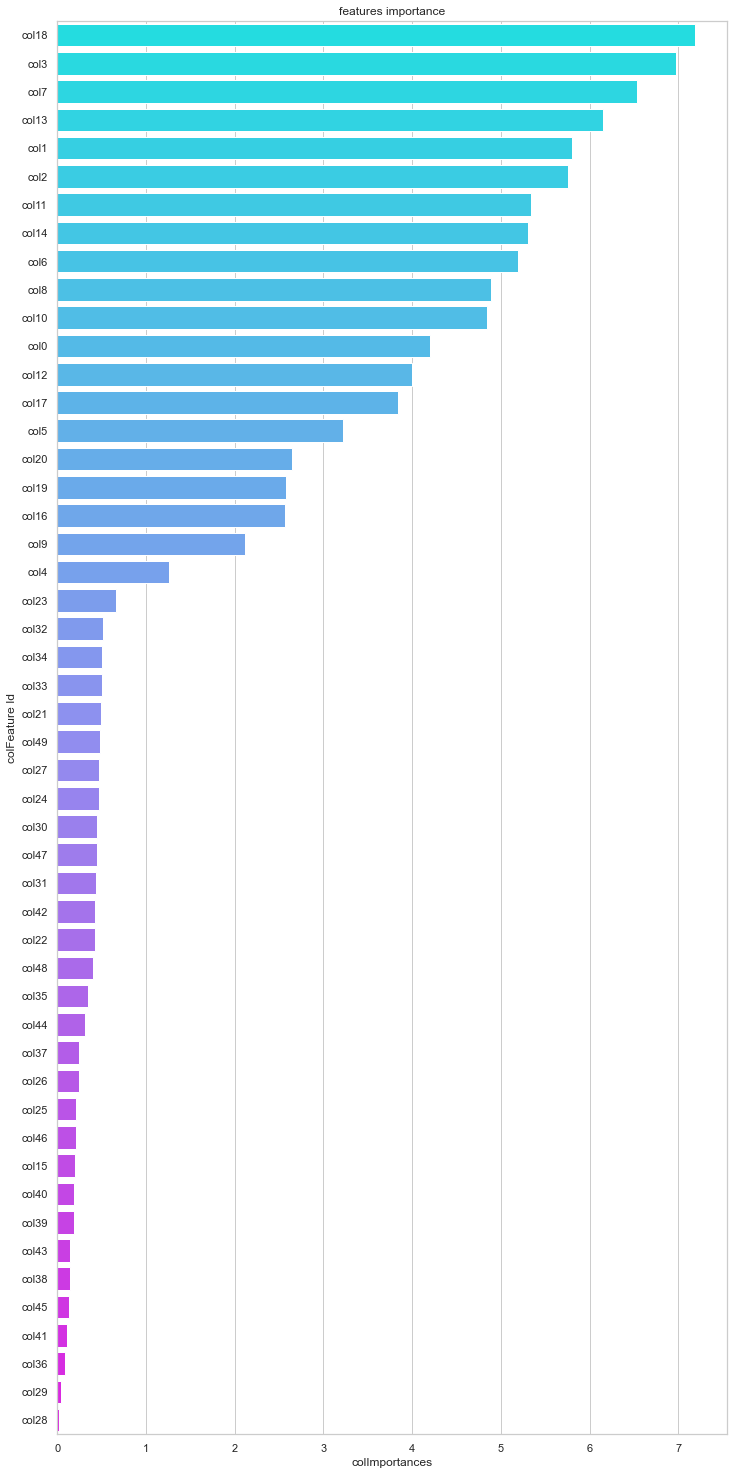

In [139]:
# Create a dataframe of feature importance 
df_feature_importance = pd.DataFrame(cat.get_feature_importance(prettified=True))
df_feature_importance=df_feature_importance.add_prefix('col')
#plotting feature importance
plt.figure(figsize=(12, 26));
feature_plot= sns.barplot(x="colImportances", y="colFeature Id", data=df_feature_importance,palette="cool");
plt.title('features importance');

In [140]:
drop_lst=df_feature_importance['colFeature Id'][df_feature_importance['colImportances']<1].tolist()

In [141]:
x_train=x_train.drop(columns=drop_lst)

In [142]:
imp_feat=x_train.columns.tolist()

In [143]:
x_test=x_test.drop(columns=drop_lst)

In [144]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.model_selection import cross_val_score

In [145]:
from sklearn.ensemble import RandomForestClassifier

In [146]:
rf=RandomForestClassifier()

In [147]:
rf.fit(x_train,y_train)
y_prob = rf.predict_proba(x_test)[:,1]
y_pred = rf.predict(x_test)
auc_test = roc_auc_score(y_test,y_prob)
print("RF-AUC Performance: ", auc_test)
recall_test = recall_score(y_test, y_pred, average='weighted')
print("RF-Recall Performance: ", recall_test)

RF-AUC Performance:  0.5041361027368183
RF-Recall Performance:  0.8900440812815826


In [154]:
cat.fit(x_train,y_train)

Learning rate set to 0.128996
0:	learn: 0.5963801	total: 120ms	remaining: 1m 59s
1:	learn: 0.5268538	total: 264ms	remaining: 2m 11s
2:	learn: 0.4768357	total: 402ms	remaining: 2m 13s
3:	learn: 0.4408726	total: 569ms	remaining: 2m 21s
4:	learn: 0.4156799	total: 754ms	remaining: 2m 30s
5:	learn: 0.3967746	total: 925ms	remaining: 2m 33s
6:	learn: 0.3830555	total: 1.07s	remaining: 2m 32s
7:	learn: 0.3729950	total: 1.21s	remaining: 2m 30s
8:	learn: 0.3657312	total: 1.36s	remaining: 2m 29s
9:	learn: 0.3602806	total: 1.51s	remaining: 2m 29s
10:	learn: 0.3562292	total: 1.65s	remaining: 2m 28s
11:	learn: 0.3532192	total: 1.79s	remaining: 2m 27s
12:	learn: 0.3509729	total: 1.96s	remaining: 2m 28s
13:	learn: 0.3495009	total: 2.07s	remaining: 2m 25s
14:	learn: 0.3482225	total: 2.21s	remaining: 2m 25s
15:	learn: 0.3472884	total: 2.34s	remaining: 2m 23s
16:	learn: 0.3465994	total: 2.49s	remaining: 2m 24s
17:	learn: 0.3460873	total: 2.67s	remaining: 2m 25s
18:	learn: 0.3456975	total: 2.88s	remaining:

In [155]:
y_pred=cat.predict(x_test)

In [156]:
from sklearn.metrics import accuracy_score
print('CAT Accuracy Score : ',accuracy_score(y_test, y_pred))

CAT Accuracy Score :  0.8900225782173959


In [149]:
from xgboost import XGBClassifier

In [150]:
xgb=XGBClassifier(n_estimators=250)

In [151]:
xgb.fit(x_train,y_train)

[22:23:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=250, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [152]:
y_pred=xgb.predict(x_test)

In [157]:
from sklearn.metrics import accuracy_score

In [158]:
print('XGB Accuracy Score : ',accuracy_score(y_test, y_pred))

XGB Accuracy Score :  0.8900225782173959
